By - Ashwin Nalwade

In this notebook, we will be exploring how data cleaning (or the lack thereof) can impact your analysis. To do so, we will be analyzing data about restaurant health inspections in New York City.

About five years ago, a data analyst uncovered some [concerning trends](https://iquantny.tumblr.com/post/76928412519/think-nyc-restaurant-grading-is-flawed-heres) in the scores that restaurants receive: scores are far more likely to be just *above* a letter grade cutoff than just below the cutoff. This suggests that inspectors are making decisions to avoid giving establishments a bad letter grade, with little regard for the health of customers.

In this lab, we're going to test whether this finding is still true and explore other features by which health inspection scores vary.

**There are two parts of this notebook:** In the first part (steps 1-3), we will be performing some data profiling. In the second part (steps 4-6), we will dive deeper into the grades and scores and how these vary by borough.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import display
pd.options.display.max_columns = None

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = [15, 5]

## Step 1: Read in the data

This data was downloaded from [NYC Open Data](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j). There's also more information available on the grading system [here](https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf). 

Take a minute to review the metadata on the [NYC Open Data](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j) page and read the documentation before we dive in. 

In [ ]:
# option to download data directly NYC Data Website (RISK: data is updated occassionally so analysis result may vary if data changes)
data_link = "https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD"
inspections = pd.read_csv(data_link)

In [ ]:
print(inspections.columns)
print(inspections.dtypes)
inspections.head()

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA'],
      dtype='object')
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           obj

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41067778,SALA ONE NINE,Manhattan,35,WEST 19 STREET,10011.0,2122292300,Spanish,09/07/2016,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Y,17.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.739621,-73.992635,105.0,3.0,5400.0,1015467.0,1.008210e+09,MN13
1,50078806,DOWNTOWN YUMMY RESTAURANT,Manhattan,39,EAST BROADWAY,10002.0,2127916618,Chinese,06/29/2018,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Y,20.0,B,06/29/2018,03/12/2021,Pre-permit (Operational) / Re-inspection,40.713546,-73.996148,103.0,1.0,800.0,1003423.0,1.002800e+09,MN27
2,41621807,"WEI WEST, BEANS & GREENS",Manhattan,102,NORTH END AVENUE,10282.0,2127861300,Asian,10/10/2018,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,11.0,A,10/10/2018,03/12/2021,Cycle Inspection / Re-inspection,40.714805,-74.016153,101.0,1.0,31703.0,1085867.0,1.000168e+09,MN25
3,40550155,PARISI BAKERY,Manhattan,198,MOTT STREET,10012.0,2122266378,Sandwiches,09/20/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,49.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.721245,-73.995599,102.0,1.0,4100.0,1007159.0,1.004790e+09,MN24
4,41476416,MILK AND ROSES,Brooklyn,1110,MANHATTAN AVENUE,11222.0,7183860160,Italian,03/14/2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,17.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.736374,-73.955263,301.0,33.0,57900.0,3063764.0,3.024880e+09,BK76


In [ ]:
inspections.describe

<bound method NDFrame.describe of            CAMIS                                                DBA  \
0       41067778                                      SALA ONE NINE   
1       50078806                          DOWNTOWN YUMMY RESTAURANT   
2       41621807                           WEI WEST, BEANS & GREENS   
3       40550155                                      PARISI BAKERY   
4       41476416                                     MILK AND ROSES   
...          ...                                                ...   
395494  40399672                                BAGELS & CREAM CAFE   
395495  50069082                                    SOUVLAKI SQUARE   
395496  41650198                                     HINOMARU RAMEN   
395497  40839257  MCU PARK STAND #130, PREMIO SAUSAGE/ARANCINI/C...   
395498  41267350                                 TENDA ASIAN FUSION   

             BORO BUILDING               STREET  ZIPCODE       PHONE  \
0       Manhattan       35     WEST   19 

In [ ]:
# Rename the columns to avoid spaces and make everything lower case
inspections.columns = [x.lower().replace(" ", "_") for x in inspections.columns]
print(inspections.columns)

Index(['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone',
       'cuisine_description', 'inspection_date', 'action', 'violation_code',
       'violation_description', 'critical_flag', 'score', 'grade',
       'grade_date', 'record_date', 'inspection_type', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract', 'bin', 'bbl',
       'nta'],
      dtype='object')


Let's see if we can reproduce the chart in that blog post using current data!

A quick google will get us the cutoffs for the letter grades from a credible source -- the NYC Health Department. According to [this](https://www1.nyc.gov/site/doh/business/food-operators/letter-grading-for-restaurants.page), the cutoffs are 
- A: 0-13
- B: 14-27
- C: 28+

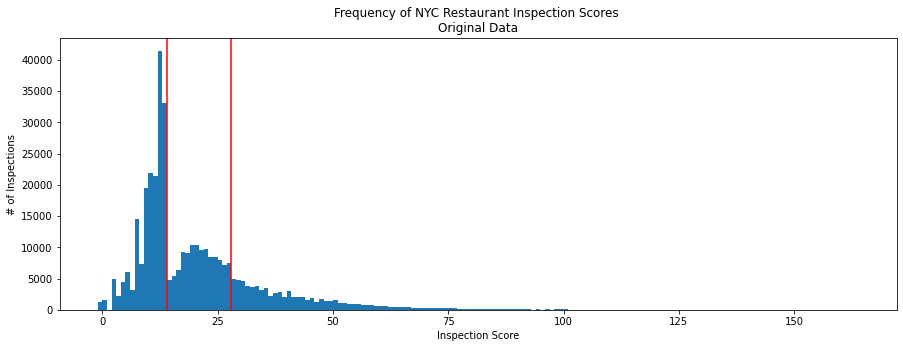

In [ ]:
# Let's see if we can reproduce the chart in that blog post right now!
def plot_grades(df, title):
    
    # Plot a histogram
    plt.hist(df['score'], bins=range(int(min(df['score'])), int(max(df['score']))+1) )
    # Add lines to indicate the cutoffs between A and B, then B and C
    plt.axvline(x=14, color="red")
    plt.axvline(x=28, color="red")
    # Add some labels
    plt.ylabel("# of Inspections")
    plt.xlabel("Inspection Score")
    plt.title("Frequency of NYC Restaurant Inspection Scores \n{}".format(title))
    return
    
plot_grades(inspections, "Original Data")




**Analysis**


We can confirm the hypothesis that the scores are far more likely to be just above a letter grade cutoff than just below the cutoff. This indicates a very high probability that the health inspectors are making decisions to avoid giving establishments a bad letter grade, with little regard for the health of customers.

If we took this to a reporter or to a public health official, it would probably cause a lot of uproar among the public, and also among the stakehloders involved in the restaurant business.

## Step 2: Back up and do some profiling

In [ ]:
inspections.grade.value_counts()

A    158358
B     25937
C      9904
P      2636
N      2298
Z       559
G         3
Name: grade, dtype: int64

In [ ]:
inspections.score.describe()

count    376666.000000
mean         20.102826
std          14.718102
min          -1.000000
25%          11.000000
50%          15.000000
75%          26.000000
max         164.000000
Name: score, dtype: float64

This brings up some questions that suggest we'll have to deal with when cleaning the data: Should there be negative scores? What do letter grades N and Z mean?

In [ ]:
# Check negative scores
# neg_scores = inspections.score < 0
inspections.score.value_counts()

12.0     41437
13.0     33032
10.0     21928
11.0     21374
9.0      19456
         ...  
133.0       10
151.0       10
150.0        9
137.0        8
136.0        7
Name: score, Length: 136, dtype: int64

In [ ]:
score_values = inspections.score.values

In [ ]:
neg_values = []
for s in score_values:
  if s < 0:
    neg_values.append(s)

In [ ]:
print(neg_values)

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.

In [ ]:
print(set(neg_values))

{-1.0}


In [ ]:
# Examine the unique scores and grades for resturants with negative scores
inspections[inspections.score < 0]

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
289,50076978,ARASHI SUSHI,Brooklyn,9605,CHURCH AVENUE,11212.0,7183852223,Japanese,01/28/2020,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,-1.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.655792,-73.915319,317.0,42.0,89000.0,3102676.0,3.046930e+09,BK96
1044,50101183,QUEEN,Brooklyn,247,STARR STREET,11237.0,9176977982,Middle Eastern,01/14/2020,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,-1.0,NaN,NaN,03/12/2021,Pre-permit (Operational) / Initial Inspection,40.705722,-73.922537,304.0,34.0,44700.0,3333195.0,3.031880e+09,BK77
1373,50068064,TENG DRAGON ON NY,Manhattan,2923,8 AVENUE,10039.0,9174978532,Chinese,02/11/2020,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,-1.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.828995,-73.937404,110.0,9.0,23502.0,1060901.0,1.020470e+09,MN03
1492,50087220,LA CASA DE FRIDA,Bronx,307,EAST 204 STREET,10467.0,9145486310,Mexican,12/17/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,-1.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.872869,-73.878445,207.0,11.0,42500.0,2018294.0,2.033450e+09,BX43
1824,41607653,OBICA MOZZARELLA BAR,Manhattan,590,MADISON AVENUE,10022.0,2123552217,Italian,03/10/2020,Establishment Closed by DOHMH. Violations wer...,06D,"Food contact surface not properly washed, rins...",Y,-1.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.762139,-73.972479,105.0,4.0,11202.0,1035778.0,1.012920e+09,MN17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393307,50070412,CROWN FRIED CHICKEN,Bronx,1459,UNIONPORT ROAD,10462.0,3475244071,Chicken,10/22/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,-1.0,NaN,NaN,03/12/2021,Cycle Inspection / Compliance Inspection,40.835393,-73.855237,209.0,18.0,22200.0,2028965.0,2.039320e+09,BX46
393452,50090858,YIP SZECHUAN RESTAURANT,Queens,65-41,MYRTLE AVENUE,11385.0,7183861945,Chinese,03/07/2020,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,-1.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.701240,-73.889233,405.0,30.0,57700.0,4089299.0,4.036770e+09,QN19
393816,50055957,LAO JIE HOT POT,Brooklyn,811,53 STREET,11220.0,7184310026,Chinese,02/29/2020,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,-1.0,B,02/29/2020,03/12/2021,Cycle Inspection / Re-inspection,40.639179,-74.005026,312.0,38.0,10600.0,3138502.0,3.056580e+09,BK34
394640,50070412,CROWN FRIED CHICKEN,Bronx,1459,UNIONPORT ROAD,10462.0,3475244071,Chicken,10/22/2019,Violations were cited in the following area(s).,04J,Appropriately scaled metal stem-type thermomet...,Y,-1.0,NaN,NaN,03/12/2021,Cycle Inspection / Compliance Inspection,40.835393,-73.855237,209.0,18.0,22200.0,2028965.0,2.039320e+09,BX46


In [ ]:
inspections[inspections.score < 0].describe()

,camis,zipcode,score,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,1.212000e+03,1195.000000,1212.0,1212.000000,1212.000000,1195.000000,1195.000000,1195.000000,1.189000e+03,1.212000e+03
mean,4.740871e+07,10746.599163,-1.0,40.156395,-72.899835,265.784937,20.487866,33591.288703,2.689246e+06,2.576653e+09
std,4.055584e+06,604.143139,0.0,4.791980,8.698941,133.695752,15.209992,35167.297658,1.384270e+06,1.382048e+09
min,4.036447e+07,10001.000000,-1.0,0.000000,-74.241774,101.000000,1.000000,502.000000,1.000044e+06,1.000000e+00
25%,4.162317e+07,10023.000000,-1.0,40.687023,-73.989853,106.000000,4.000000,9400.000000,1.044832e+06,1.012040e+09
50%,5.005141e+07,11201.000000,-1.0,40.739681,-73.957020,306.000000,20.000000,16800.000000,3.045826e+06,3.011000e+09
75%,5.008720e+07,11354.000000,-1.0,40.762139,-73.871577,405.000000,34.000000,51450.000000,4.065258e+06,4.021390e+09
max,5.010388e+07,11691.000000,-1.0,40.903604,0.000000,503.000000,51.000000,157101.000000,5.151293e+06,5.080430e+09


Unfortunately data dictonary did not answer this question.

In [ ]:
inspections.grade.value_counts()

A    158358
B     25937
C      9904
P      2636
N      2298
Z       559
G         3
Name: grade, dtype: int64

In [ ]:
# Check restaurants with grades N and Z
grade_values = inspections.grade.values

In [ ]:
g_values = []
for g in grade_values:
  if g == 'N' or g == 'Z':
    g_values.append(g)

In [ ]:
print(g_values)

['N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'Z', 'N', 'N', 'N', 'N', 'N', 'Z', 'Z', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'Z', 'N', 'N', 'N', 'Z', 'N', 'Z', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'Z', 'N', 'N', 'N', 'N', 'Z', 'N', 'N', 'Z', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Z', 'N',

In [ ]:
print(set(g_values))

{'Z', 'N'}


In [ ]:
inspections[inspections.grade == 'N'].describe()

,camis,zipcode,score,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,2.298000e+03,2272.000000,2274.00000,2295.000000,2295.000000,2269.000000,2269.000000,2269.000000,2.258000e+03,2.295000e+03
mean,5.006262e+07,10723.407570,30.67898,40.261972,-73.105092,260.744822,21.397973,30133.041869,2.646320e+06,2.532642e+09
std,5.466709e+05,602.870157,21.37738,4.311295,7.827668,133.115777,15.905747,30464.182246,1.384655e+06,1.370711e+09
min,4.060085e+07,10001.000000,-1.00000,0.000000,-74.248434,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,5.009397e+07,10022.750000,17.00000,40.680395,-73.986599,106.000000,4.000000,8100.000000,1.050762e+06,1.013140e+09
50%,5.009906e+07,11103.500000,27.00000,40.729284,-73.956579,303.000000,21.000000,18300.000000,3.061600e+06,3.015790e+09
75%,5.010155e+07,11237.000000,40.00000,40.759983,-73.905225,402.000000,34.000000,44900.000000,4.030244e+06,4.008434e+09
max,5.010912e+07,11694.000000,133.00000,40.889409,0.000000,503.000000,51.000000,161700.000000,5.158987e+06,5.080460e+09


In [ ]:
inspections[inspections.grade == 'Z'].describe()

,camis,zipcode,score,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,5.590000e+02,557.000000,559.000000,558.000000,558.000000,556.000000,556.000000,556.000000,5.510000e+02,5.580000e+02
mean,4.705077e+07,10728.946140,13.268336,40.588171,-73.668452,255.336331,20.969424,30699.471223,2.577885e+06,2.486370e+09
std,4.226683e+06,579.815637,13.021883,2.437613,4.422875,123.031968,15.328504,31938.713273,1.280748e+06,1.267872e+09
min,4.036909e+07,10001.000000,0.000000,0.000000,-74.136710,101.000000,1.000000,300.000000,1.000843e+06,1.000000e+00
25%,4.155907e+07,10029.000000,5.000000,40.681488,-73.986398,108.000000,6.000000,7700.000000,1.062926e+06,1.014418e+09
50%,5.004489e+07,10474.000000,10.000000,40.738346,-73.945116,301.000000,20.000000,19600.000000,3.013422e+06,3.003300e+09
75%,5.007849e+07,11229.000000,15.000000,40.775760,-73.879300,401.000000,34.000000,40825.000000,4.004139e+06,4.001900e+09
max,5.010268e+07,11693.000000,69.000000,40.900648,0.000000,502.000000,50.000000,155101.000000,5.112426e+06,5.036460e+09


The records with grade 'N' and 'Z' looks reasonable. So a further look at the data dictionary revealed the following meanings:  
* N = Not Yet Graded  
* A = Grade A  
* B = Grade B  
* C = Grade C  
* Z = Grade Pending  
* P = Grade Pending (issued on re-opening following an initial inspection that resulted in a closure)

In [ ]:
# Lets check the zipcodes
inspections.zipcode.value_counts()

10003.0    10159
10019.0     9376
10013.0     8505
10036.0     8258
10002.0     8179
           ...  
10151.0        2
13746.0        1
11550.0        1
11553.0        1
20147.0        1
Name: zipcode, Length: 230, dtype: int64

We know all NYC zipcodes start with "1" so why do we see a zipcode with "20147"?

In [ ]:
# Lets checkout the record with zipcode 20147.
inspections[inspections.zipcode == 20147]

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
36900,50108022,"BEECHERS , SWEET LEAF",0,20408,BASHAN DR,20147.0,7037237264,Other,01/01/1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03/12/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that the record apparently belongs to boro "0". We also know that NYC has only 5 boroughs - Manhattan, Brooklyn, Queens, Bronx and Staten Island.

In [ ]:
# Examine the boros here
print(set(inspections.boro))

{'Queens', 'Bronx', '0', 'Brooklyn', 'Manhattan', 'Staten Island'}


In [ ]:
# Seems like we have an additional borough

In [ ]:
print(len(set(inspections.boro)))

6


In [ ]:
print(inspections.boro)

0         Manhattan
1         Manhattan
2         Manhattan
3         Manhattan
4          Brooklyn
            ...    
395494       Queens
395495       Queens
395496       Queens
395497     Brooklyn
395498     Brooklyn
Name: boro, Length: 395499, dtype: object


In [ ]:
inspections.boro.describe()

count        395499
unique            6
top       Manhattan
freq         155401
Name: boro, dtype: object

Apparently there is a boro with name "0" in our record that suprisingly has 246 records. We have to check those out.

In [ ]:
# Print the restaurants from our magical boro "0" here
inspections[inspections.boro == '0'].describe()

,camis,zipcode,score,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,2.410000e+02,124.000000,221.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.518631e+07,12260.612903,22.158371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.172142e+06,4543.378099,17.090063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.088359e+07,10166.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.166471e+07,11249.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.168515e+07,11249.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.004980e+07,11451.000000,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5.010854e+07,30339.000000,76.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Surprisingly, these records above seem meaningful but we need to investigate more on what boro "0" means in this case since NYC doesn't have a borough called "0". We will come back to this.

In [ ]:
# What are the worst restaurants?
inspections.loc[inspections.score == max(inspections.score)]

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
16674,50061507,BICKLES 2 GO,Bronx,647,COURTLANDT AVENUE,10451.0,3479634184,"Caribbean (Inc. Cuban, Puerto Rican)",05/08/2019,Establishment Closed by DOHMH. Violations wer...,09B,Thawing procedures improper.,N,164.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.818921,-73.918478,201.0,17.0,6700.0,2001885.0,2.024110e+09,BX34
31891,50061507,BICKLES 2 GO,Bronx,647,COURTLANDT AVENUE,10451.0,3479634184,"Caribbean (Inc. Cuban, Puerto Rican)",05/08/2019,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Y,164.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.818921,-73.918478,201.0,17.0,6700.0,2001885.0,2.024110e+09,BX34
54846,50099216,RENIX SPORTS BAR,Queens,3764,103RD ST,11368.0,7184576057,American,10/03/2019,Violations were cited in the following area(s).,05H,"No facilities available to wash, rinse and san...",Y,164.0,NaN,NaN,03/12/2021,Pre-permit (Non-operational) / Initial Inspection,40.752760,-73.864199,403.0,21.0,40500.0,4044237.0,4.017680e+09,QN26
75517,50099216,RENIX SPORTS BAR,Queens,3764,103RD ST,11368.0,7184576057,American,10/03/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,164.0,NaN,NaN,03/12/2021,Pre-permit (Non-operational) / Initial Inspection,40.752760,-73.864199,403.0,21.0,40500.0,4044237.0,4.017680e+09,QN26
89983,50099216,RENIX SPORTS BAR,Queens,3764,103RD ST,11368.0,7184576057,American,10/03/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,164.0,NaN,NaN,03/12/2021,Pre-permit (Non-operational) / Initial Inspection,40.752760,-73.864199,403.0,21.0,40500.0,4044237.0,4.017680e+09,QN26
90524,50061507,BICKLES 2 GO,Bronx,647,COURTLANDT AVENUE,10451.0,3479634184,"Caribbean (Inc. Cuban, Puerto Rican)",05/08/2019,Establishment Closed by DOHMH. Violations wer...,05D,Hand washing facility not provided in or near ...,Y,164.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.818921,-73.918478,201.0,17.0,6700.0,2001885.0,2.024110e+09,BX34
93526,50099216,RENIX SPORTS BAR,Queens,3764,103RD ST,11368.0,7184576057,American,10/03/2019,Violations were cited in the following area(s).,05C,Food contact surface improperly constructed or...,Y,164.0,NaN,NaN,03/12/2021,Pre-permit (Non-operational) / Initial Inspection,40.752760,-73.864199,403.0,21.0,40500.0,4044237.0,4.017680e+09,QN26
116665,50061507,BICKLES 2 GO,Bronx,647,COURTLANDT AVENUE,10451.0,3479634184,"Caribbean (Inc. Cuban, Puerto Rican)",05/08/2019,Establishment Closed by DOHMH. Violations wer...,02H,Food not cooled by an approved method whereby ...,Y,164.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.818921,-73.918478,201.0,17.0,6700.0,2001885.0,2.024110e+09,BX34
120412,50061507,BICKLES 2 GO,Bronx,647,COURTLANDT AVENUE,10451.0,3479634184,"Caribbean (Inc. Cuban, Puerto Rican)",05/08/2019,Establishment Closed by DOHMH. Violations wer...,05F,Insufficient or no refrigerated or hot holding...,Y,164.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.818921,-73.918478,201.0,17.0,6700.0,2001885.0,2.024110e+09,BX34
173336,50099216,RENIX SPORTS BAR,Queens,3764,103RD ST,11368.0,7184576057,American,10/03/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,164.0,NaN,NaN,03/12/2021,Pre-permit (Non-operational) / Initial Inspection,40.752760,-73.864199,403.0,21.0,40500.0,4044237.0,4.017680e+09,QN26


In [ ]:
# Check out one restaraunt in particular
inspections.loc[(inspections.dba == "DOS TOROS TAQUERIA") & (inspections.street == "4 AVENUE"), ]

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
11414,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,05/09/2019,Violations were cited in the following area(s).,08B,Covered garbage receptacle not provided or ina...,N,12.0,A,05/09/2019,03/12/2021,Cycle Inspection / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22
23190,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,06/20/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,13.0,A,06/20/2017,03/12/2021,Cycle Inspection / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22
42492,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,05/09/2019,Violations were cited in the following area(s).,02I,Food prepared from ingredients at ambient temp...,Y,12.0,A,05/09/2019,03/12/2021,Cycle Inspection / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22
105086,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,05/12/2016,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,8.0,A,05/12/2016,03/12/2021,Cycle Inspection / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22
134809,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,05/09/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,12.0,A,05/09/2019,03/12/2021,Cycle Inspection / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22
170620,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,05/24/2018,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",N,6.0,A,05/24/2018,03/12/2021,Cycle Inspection / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22
185183,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,05/12/2016,Violations were cited in the following area(s).,15I,"""""No Smoking” and/or 'Smoking Permitted” sign ...",N,NaN,NaN,NaN,03/12/2021,Smoke-Free Air Act / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22
322993,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,05/24/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,6.0,A,05/24/2018,03/12/2021,Cycle Inspection / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22
336198,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,05/12/2016,Violations were cited in the following area(s).,15L,Smoke free workplace smoking policy inadequate...,N,NaN,NaN,NaN,03/12/2021,Smoke-Free Air Act / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22
364654,41445110,DOS TOROS TAQUERIA,Manhattan,137,4 AVENUE,10003.0,2126777300,Mexican,06/20/2017,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Y,13.0,A,06/20/2017,03/12/2021,Cycle Inspection / Initial Inspection,40.733656,-73.989864,103.0,2.0,4200.0,1077569.0,1.005590e+09,MN22


Are there any features that might have a functional dependency, or even redundancy? Let's test it.

In [ ]:
def test_dependency(df, col1, col2):
    '''Tests whether there is total redundancy betwen col1 and col2
       by testing the number of unique combinations'''
    unique_1 = len(df[col1].unique())
    unique_2 = len(df[col2].unique())
    unique_combos = len(df[[col1, col2]].drop_duplicates())
    print("Unique values of {}: {}".format(col1, unique_1))
    print("Unique values of {}: {}".format(col2, unique_2))
    print("Unique combos of {} and {}: {}".format(col1, col2, unique_combos))
    return unique_combos == max(unique_1, unique_2)

In [ ]:
# Fill in some variables that you think might have functional dependencies
test_dependency(inspections, 'violation_code', 'violation_description')

Unique values of violation_code: 106
Unique values of violation_description: 93
Unique combos of violation_code and violation_description: 108


False

In [ ]:
test_dependency(inspections, 'camis', 'dba')

Unique values of camis: 29316
Unique values of dba: 22730
Unique combos of camis and dba: 29316


True

In [ ]:
# try your own variables here
test_dependency(inspections, 'score', 'dba')

Unique values of score: 137
Unique values of dba: 22730
Unique combos of score and dba: 111042


False

In [ ]:
# and try another pair of variables here
test_dependency(inspections, 'violation_code', 'grade')

Unique values of violation_code: 106
Unique values of grade: 8
Unique combos of violation_code and grade: 428


False

## Step 3: Find a unique identifier 

Let's start with CAMIS, because the documentation told us that it's a unique identifier for each restaurant. Is it a unique identifier for the dataset?

In [ ]:
inspections.shape[0] == inspections.camis.nunique()

False

Wow, we don't even know what "level" the data is at right now. Let's figure out what we *can* use as a unique identifier. 

In [ ]:
# First, is this even possible? Are the rows of our data unique?
print("# of duplicates: ", sum(inspections.duplicated()))

# No -- so let's drop these duplicates
inspections = inspections.loc[~inspections.duplicated(), ]

# Now we can search for a unique identifier

# of duplicates:  1


In [ ]:
# Test if these variables are a unique identifier
possible_identifier = ['camis', 'inspection_date']
print("# of duplicates: ",sum(inspections.duplicated(possible_identifier)))

# Show some duplicates
inspections.sort_values(possible_identifier, axis=0, inplace=True)
inspections.loc[inspections.duplicated(possible_identifier, keep=False), ].head(10)


# of duplicates:  258644


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
25293,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,5.0,A,05/11/2018,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
351691,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,5.0,A,05/11/2018,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
104446,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",05/16/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,14.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
109471,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",05/16/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,14.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
352208,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",05/16/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,14.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
96724,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,7.0,A,05/18/2017,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
258087,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,7.0,A,05/18/2017,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
25092,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",06/11/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,6.0,A,06/11/2019,03/12/2021,Cycle Inspection / Re-inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
292125,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",06/11/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,6.0,A,06/11/2019,03/12/2021,Cycle Inspection / Re-inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37
381224,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",06/11/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,6.0,A,06/11/2019,03/12/2021,Cycle Inspection / Re-inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37


Without a domain expert right at hand, we can't resolve some of these duplicates for the purposes of our analysis. Because the total number is small, we can drop them. However, the appropriateness of dropping duplicates will vary from case to case. 

Can you think of an example where it would be inappropriate to drop duplicates?

In [ ]:
# Drop the duplicates we can't resolve 
unique_id =  ['camis', 'inspection_date', 'violation_code', 'inspection_type']
inspections = inspections.loc[~inspections.duplicated(unique_id), ]
assert sum(inspections.duplicated(unique_id)==0)

That's probably not the level we want to do our analysis at, though: we want one record for every inspection of every restaurant, because that's the level at which grades get assigned. (For example, you don't get a letter grade for not having roaches -- you get a letter grade for the total of all the violations)

Do we really want the data at this level though? 

Let's try to understand more about inspection types.

In [ ]:
inspections.inspection_type.value_counts()

Cycle Inspection / Initial Inspection                          230305
Cycle Inspection / Re-inspection                                94227
Pre-permit (Operational) / Initial Inspection                   27949
Pre-permit (Operational) / Re-inspection                        12040
Administrative Miscellaneous / Initial Inspection                7344
Cycle Inspection / Reopening Inspection                          4336
Pre-permit (Non-operational) / Initial Inspection                3281
Smoke-Free Air Act / Initial Inspection                          1947
Administrative Miscellaneous / Re-inspection                     1946
Trans Fat / Initial Inspection                                   1505
Pre-permit (Operational) / Compliance Inspection                 1250
Calorie Posting / Initial Inspection                             1109
Inter-Agency Task Force / Initial Inspection                     1067
Pre-permit (Operational) / Reopening Inspection                  1053
Cycle Inspection / C

In [ ]:
# Are all of these inspections similar with respect to the things we care about?
# That is, do all inspeciton types end with a grade that gets posted out on the window?
inspections.loc[inspections.grade.notna(), "inspection_type"].value_counts()

Cycle Inspection / Re-inspection                        90912
Cycle Inspection / Initial Inspection                   82692
Pre-permit (Operational) / Re-inspection                11472
Pre-permit (Operational) / Initial Inspection           10074
Cycle Inspection / Reopening Inspection                  3414
Pre-permit (Operational) / Reopening Inspection           633
Pre-permit (Non-operational) / Initial Inspection         404
Pre-permit (Non-operational) / Re-inspection               40
Inter-Agency Task Force / Initial Inspection               17
Smoke-Free Air Act / Initial Inspection                    14
Administrative Miscellaneous / Initial Inspection          10
Pre-permit (Non-operational) / Compliance Inspection        8
Pre-permit (Operational) / Compliance Inspection            5
Name: inspection_type, dtype: int64

Based on this information, let's make a judgement call: our analysis will only be based on cycle inspections.

We will have to be sure to mention this whenever we are presenting our results.

In [ ]:
inspections = inspections.loc[inspections.inspection_type.isin(["Cycle Inspection / Re-inspection", "Cycle Inspection / Initial Inspection"]), ] 

In [ ]:
# Let's see if we still need inspection_type to uniquely identify the data
unique_id =  ['camis', 'inspection_date', 'violation_code']
assert sum(inspections.duplicated(unique_id)==0)

Great! Now we know that our data has one record per violation that was discovered at a given restaurant on a given date. 

Should we just keep one record per restaurant per inspection date arbitrarily?

In [ ]:
# Test whether we'll lose other information
# if we drop duplicates 
unique_id = ['camis', 'inspection_date']
columns_not_dropped = list(inspections.columns)
columns_not_dropped.remove('violation_code')
columns_not_dropped.remove('violation_description')
print("Unique rows if we drop everything at the violation level: ", len(inspections.loc[~inspections.duplicated(columns_not_dropped), ]))
print("Unique rows if we arbitrarily keep rows that are unique in terms of camis and inspeciton date: ", len(inspections.loc[~inspections.duplicated(unique_id), ]))

Unique rows if we drop everything at the violation level:  190814
Unique rows if we arbitrarily keep rows that are unique in terms of camis and inspeciton date:  111065


We won't actually drop the violations data for now, in case we need it later -- but it's nice to know that we *can* drop it when we're ready to do our analysis. Now we know how to get one record per cycle inspection per restaurant, and we know a lot more about our dataset.

Let's check back in with the plot we wanted to make -- if we were to do the analysis after the cleaning we've done so far, has it changed at all from our original attempt?

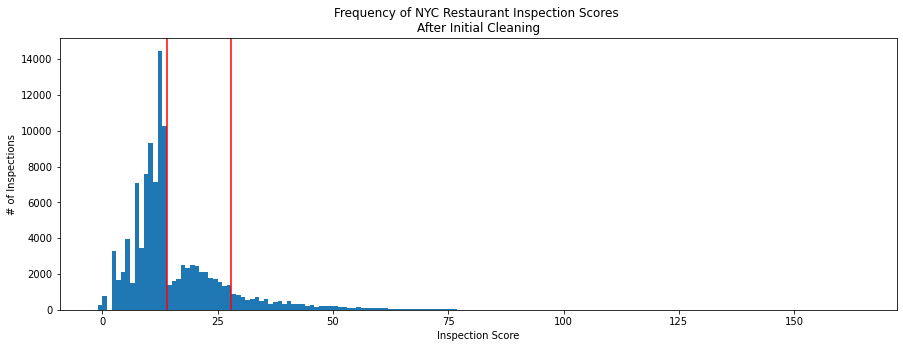

In [ ]:
plot_grades(inspections.loc[~inspections.duplicated(unique_id), ], "After Initial Cleaning")

How has the plot changed after cleaning?

**Analysis**

After cleaning, the number of scores which are just above the letter grade cutoff seem to have gone down. 

## Step 4: Deep dive into the grades and scores

Recall that we had grades of N and Z. The data dictionary indicated these were related to "grade pending."

Next, let's look at the relationship between grades and scores, and see if it matches what we found on the Department of Health website. As a reminder, the cutoffs should be:

- A: 0-13
- B: 14-27
- C: 28+

In [ ]:
inspections.groupby(["grade"]).agg({'score': [np.min,np.max]})

score      
       amin  amax
grade            
A       0.0  23.0
B      -1.0  32.0
C      -1.0  98.0
N      -1.0  40.0
Z      20.0  53.0

That doesn't look right. Let's look at some actual cases that appear miscoded.

In [ ]:
# Cases with a score too high to be assigned an "A" that are marked as an "A"
inspections.sort_values(unique_id, axis=0, inplace=True)
inspections.loc[(inspections.grade=="A") & (inspections.score > 13), ].head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
361546,40399329,ARTE RESTAURANT,Manhattan,21,EAST 9 STREET,10003.0,2124730077,Italian,10/15/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,23.0,A,10/15/2019,03/12/2021,Cycle Inspection / Re-inspection,40.732347,-73.994725,102.0,2.0,5900.0,1009240.0,1.005670e+09,MN23
193944,40711301,CHICKEN FESTIVAL,Queens,29-19,DITMARS BOULEVARD,11105.0,7187289696,Chicken,03/14/2018,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,14.0,A,03/14/2018,03/12/2021,Cycle Inspection / Re-inspection,40.776718,-73.911525,401.0,22.0,11300.0,4017714.0,4.008460e+09,QN72
292882,40711301,CHICKEN FESTIVAL,Queens,29-19,DITMARS BOULEVARD,11105.0,7187289696,Chicken,03/14/2018,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Y,14.0,A,03/14/2018,03/12/2021,Cycle Inspection / Re-inspection,40.776718,-73.911525,401.0,22.0,11300.0,4017714.0,4.008460e+09,QN72
361238,40711301,CHICKEN FESTIVAL,Queens,29-19,DITMARS BOULEVARD,11105.0,7187289696,Chicken,03/14/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,14.0,A,03/14/2018,03/12/2021,Cycle Inspection / Re-inspection,40.776718,-73.911525,401.0,22.0,11300.0,4017714.0,4.008460e+09,QN72
20340,41021991,EXTRA VIRGIN,Manhattan,259,WEST 4 STREET,10014.0,2126919359,Mediterranean,05/09/2018,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,21.0,A,05/09/2018,03/12/2021,Cycle Inspection / Re-inspection,40.735287,-74.003258,102.0,3.0,7300.0,1010860.0,1.006128e+09,MN23


In [ ]:
# Check cases with a negative score
inspections.loc[(inspections.score < 0), ].head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
23522,40364467,NYAC MAIN DINING ROOM,Manhattan,180,CENTRAL PARK SOUTH,10019.0,2127677000,American,01/07/2020,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,-1.0,C,01/07/2020,03/12/2021,Cycle Inspection / Re-inspection,40.766718,-73.978737,105.0,4.0,13700.0,1023750.0,1.010110e+09,MN17
84863,40364467,NYAC MAIN DINING ROOM,Manhattan,180,CENTRAL PARK SOUTH,10019.0,2127677000,American,01/07/2020,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,-1.0,C,01/07/2020,03/12/2021,Cycle Inspection / Re-inspection,40.766718,-73.978737,105.0,4.0,13700.0,1023750.0,1.010110e+09,MN17
219309,40364467,NYAC MAIN DINING ROOM,Manhattan,180,CENTRAL PARK SOUTH,10019.0,2127677000,American,01/07/2020,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,-1.0,C,01/07/2020,03/12/2021,Cycle Inspection / Re-inspection,40.766718,-73.978737,105.0,4.0,13700.0,1023750.0,1.010110e+09,MN17
20680,40365627,JAHN'S RESTAURANT,Queens,81-04,37 AVENUE,11372.0,7186510700,American,03/16/2020,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Y,-1.0,B,03/16/2020,03/12/2021,Cycle Inspection / Re-inspection,40.749653,-73.885074,403.0,21.0,28300.0,4030010.0,4.012920e+09,QN28
39747,40365627,JAHN'S RESTAURANT,Queens,81-04,37 AVENUE,11372.0,7186510700,American,03/16/2020,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,-1.0,B,03/16/2020,03/12/2021,Cycle Inspection / Re-inspection,40.749653,-73.885074,403.0,21.0,28300.0,4030010.0,4.012920e+09,QN28


It's time to make a judgement call. Here are the options:

1. Trust the grades in the dataset, and ignore the inconsistent scores. 
2. Trust the scores in the dataset, and resassign new grades based on the scores. 
3. Trust the list of violations, and try to reconstruct the grades and the scores.
4. Trust nothing, and drop all the cases with inconsistencies. 

Which would you do? What additional information would you want before deciding?

In [ ]:
# If we're not going to use the violations, we can go ahead and collapse our data to the restaurant-inspection level
inspections = inspections.loc[~inspections.duplicated(unique_id), ]

In [ ]:
# Drop cases with impossible scores (-1)
inspections = inspections.loc[inspections.score > 0, ]

In [ ]:
# Count miscoded cases
print("Miscoded As: ", len(inspections.loc[(inspections.grade=="A") & (inspections.score > 13), ]))
print("Miscoded Bs: ", len(inspections.loc[(inspections.grade=="B") & ((inspections.score < 14) | (inspections.score > 27))]))
print("Miscoded Cs: ", len(inspections.loc[(inspections.grade=="C") & (inspections.score < 28), ]))
print("Total Graded Cases: ", len(inspections.loc[inspections.grade.isin(["A", "B", "C"])]))

Miscoded As:  6
Miscoded Bs:  11
Miscoded Cs:  3
Total Graded Cases:  72668


In [ ]:
# Drop miscoded cases
inspections = inspections.loc[~((inspections.grade=="A") & (inspections.score > 13)), ]
inspections = inspections.loc[~((inspections.grade=="B") & (inspections.score < 14)), ]
inspections = inspections.loc[~((inspections.grade=="B") & (inspections.score > 27)), ]
inspections = inspections.loc[~((inspections.grade=="C") & (inspections.score < 28)), ]

Now, we should check out cases with missing grades. 

In [ ]:
print("Cases with missing grades: ", len(inspections.loc[inspections.grade.isna(), ]))
print("Score distribution for cases with missing grades: ", inspections.loc[inspections.grade.isna(), ].score.describe())

Cases with missing grades:  37344
Score distribution for cases with missing grades:  count    37344.000000
mean        23.921031
std         12.928039
min          2.000000
25%         16.000000
50%         21.000000
75%         29.000000
max        164.000000
Name: score, dtype: float64


We aren't actually using the grades for our analysis, and the missingness has meaning, so we can leave these missing values as-is. Sometimes missing data *shouldn't* be imputed!

Time to revisit our plot again.

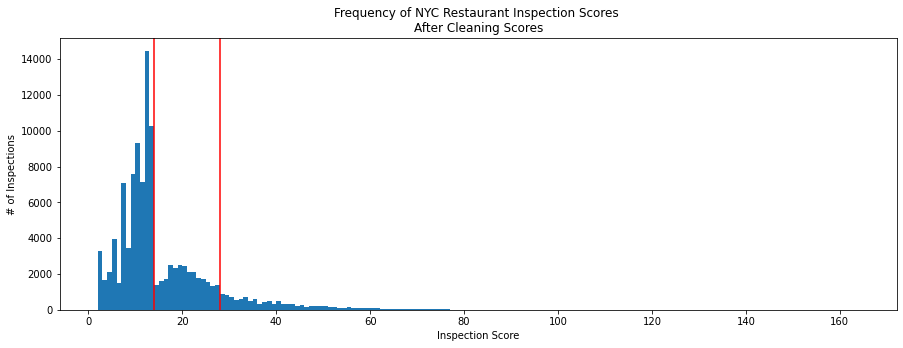

In [ ]:
plot_grades(inspections.loc[~inspections.duplicated(unique_id), ], "After Cleaning Scores")

Now, our original question is whether this tendency to bump up borderline cases has gotten better or worse over time. We can analyze that using the inspection_date column.... but first we have to clean it.

In [ ]:
# Check the current type of the date column
inspections.inspection_date

25293     05/11/2018
104446    05/16/2019
96724     05/18/2017
25092     06/11/2019
49397     10/21/2019
             ...    
16699     02/26/2020
87910     03/16/2020
132287    03/10/2020
196076    12/18/2019
69554     03/12/2020
Name: inspection_date, Length: 110029, dtype: object

In [ ]:
inspections.inspection_date = pd.to_datetime(inspections.inspection_date)
inspections.inspection_date.head(10)

25293    2018-05-11
104446   2019-05-16
96724    2017-05-18
25092    2019-06-11
49397    2019-10-21
61209    2019-11-04
219684   2019-03-04
225622   2018-03-13
54207    2016-04-30
17419    2017-06-26
Name: inspection_date, dtype: datetime64[ns]

In [ ]:
inspections['year'] = inspections.inspection_date.dt.year
inspections.year.value_counts()

2019    40322
2018    33905
2017    22444
2020     8009
2016     5279
2015       41
2014       10
2012        7
2011        6
2013        5
2009        1
Name: year, dtype: int64

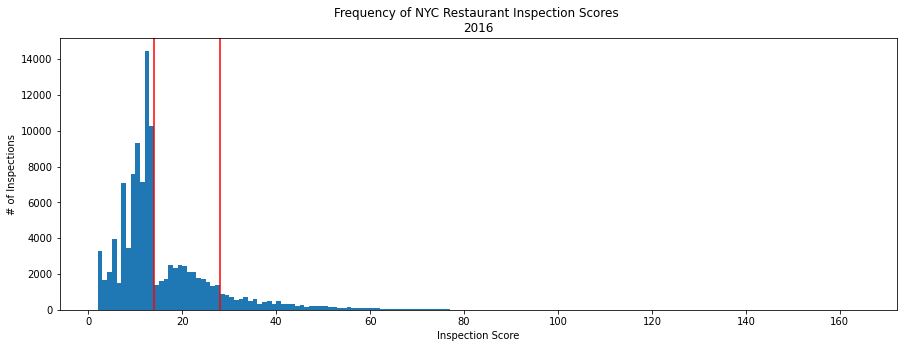

In [ ]:
# Plot the grades for each year from 2016 to 2021 using "plot_grades" function.
inspections_2016 = inspections.loc[inspections.year == "2016" ]
plot_grades(inspections, "2016")
#inspections = inspections.loc[inspections.inspection_type.isin(["Cycle Inspection / Re-inspection", "Cycle Inspection / Initial Inspection"]), ] 

## Step 5: Analysis by borough 

Let's compare the distribution of scores by borough. First, we should check to see if borough was coded correctly. We know that there should be a functional dependency between zipcode and borough, and we can test for violations of that dependency. 

Note that this approach means that we're trusting the zip code column more than the borough column. 

In [ ]:
test_dependency(inspections, 'zipcode', 'boro')

Unique values of zipcode: 225
Unique values of boro: 6
Unique combos of zipcode and boro: 235


False

To resolve the violations, we should check for cases where one zipcode corresponds to multiple boroughs. (The relationship between zipcodes and boroughs should be many to one.)

In [ ]:
zip_boro_crosswalk = inspections[['zipcode', 'boro']].drop_duplicates()
zip_boro_crosswalk.sort_values('zipcode', inplace=True)
zip_boro_crosswalk.loc[zip_boro_crosswalk.duplicated('zipcode', keep=False), ]

,zipcode,boro
140922,10168.0,0
367383,10168.0,Manhattan
190740,11249.0,Brooklyn
106193,11249.0,0
11371,11370.0,Queens
46849,11370.0,Bronx
327536,11371.0,Queens
279748,11371.0,Manhattan
299339,11430.0,Manhattan
211551,11430.0,Queens


The cases miscoded as zero are an easy fix. 

The rest of the cases are missing zip codes. Since we're doing our analysis by borough and not by zip code, that's fine for our purposes.

In [ ]:
# Recode miscoded zip codes
inspections.loc[inspections.zipcode == 10168, "boro"] = "Manhattan"
inspections.loc[inspections.zipcode == 11249, "boro"] = "Brooklyn"

# Re-make the crosswalk now that we've fixed the data
zip_boro_crosswalk = inspections[['zipcode', 'boro']].drop_duplicates()

But just to be on the safe side, let's check against a ground truth source: a list of zip codes by borough.  

We got the zipcode and borough data from this [site](https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php)

In [ ]:
nyc_zipcode_path = "https://raw.githubusercontent.com/DataResponsibly/rds/main/assets/zip_borough.csv"
true_zip_boro_crosswalk = pd.read_csv(nyc_zipcode_path)
true_zip_boro_crosswalk = true_zip_boro_crosswalk.replace("Staten", "Staten Island")
true_zip_boro_crosswalk.head()

,zip,borough
0,10001,Manhattan
1,10002,Manhattan
2,10003,Manhattan
3,10004,Manhattan
4,10005,Manhattan


In [ ]:
true_zip_boro_crosswalk[true_zip_boro_crosswalk.borough == 'Manhattan']

,zip,borough
0,10001,Manhattan
1,10002,Manhattan
2,10003,Manhattan
3,10004,Manhattan
4,10005,Manhattan
...,...,...
91,10278,Manhattan
92,10279,Manhattan
93,10280,Manhattan
94,10281,Manhattan


In [ ]:
# Compare the two crosswalks
merged_crosswalk = zip_boro_crosswalk.merge(true_zip_boro_crosswalk, how="left", left_on="zipcode", right_on="zip")
merged_crosswalk.loc[(merged_crosswalk.boro != merged_crosswalk.borough) & merged_crosswalk.zipcode.notna(), ]

,zipcode,boro,zip,borough
7,10065.0,Manhattan,NaN,NaN
43,10075.0,Manhattan,NaN,NaN
56,11001.0,Queens,NaN,NaN
145,11040.0,Queens,NaN,NaN
193,10285.0,0,NaN,NaN
204,10000.0,Manhattan,NaN,NaN
208,11005.0,Queens,NaN,NaN
210,11451.0,0,NaN,NaN
211,10179.0,Manhattan,NaN,NaN
215,11430.0,Manhattan,11430.0,Queens


There's another that we didn't catch simply by testing for violations! Good thing we checked against a ground truth source.

The other two zip codes appear fake. We should check the address or coordinates of those restaurants to confirm that they are marked as being in the right borough.

In [ ]:
# Recode the remaining zero
inspections.loc[inspections.zipcode == 10285, "boro"] = "Manhattan"

In [ ]:
# List the cases with fake zip code (30339) so that we can check the borough by hand
inspections.loc[inspections.zipcode == 30339]

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,year
193470,50064306,DYLAN'S CANDY BAR,0,2849,paces ferry rd,30339.0,7187514247,Other,2019-05-16,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,12.0,A,05/16/2019,03/12/2021,Cycle Inspection / Initial Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
18706,50064306,DYLAN'S CANDY BAR,0,2849,paces ferry rd,30339.0,7187514247,Other,2018-06-07,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,10.0,A,06/07/2018,03/12/2021,Cycle Inspection / Initial Inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [ ]:
# Recode the remaining boros with "0" to Manhattan
inspections['boro'].replace("0","Manhattan", inplace=True)

Let's do one final check to make sure that there are no more zeros.

In [ ]:
(inspections.boro != "0").all()

True

In [ ]:
assert (inspections.boro != "0").all()

Now, we're ready to analyze scores by borough!

In [ ]:
inspections.boro.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

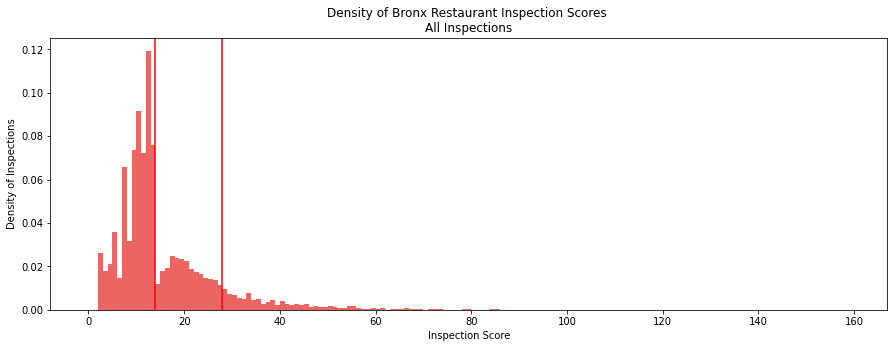

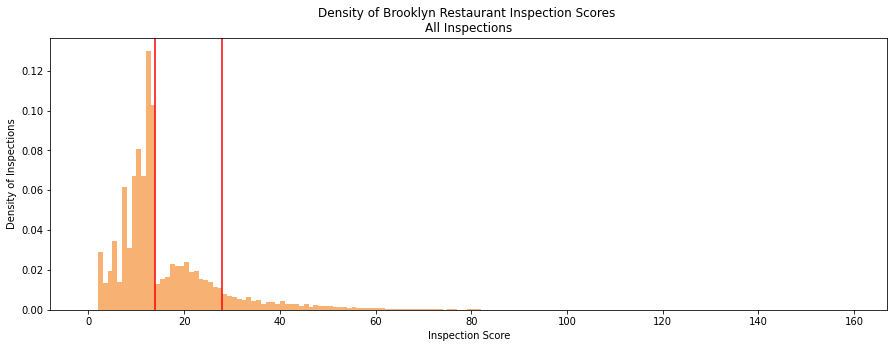

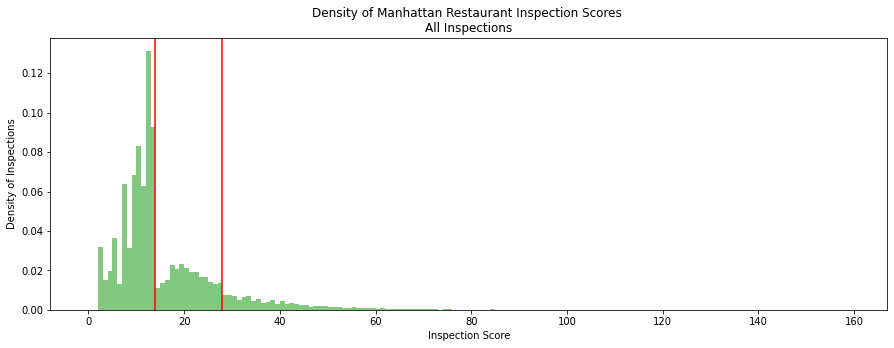

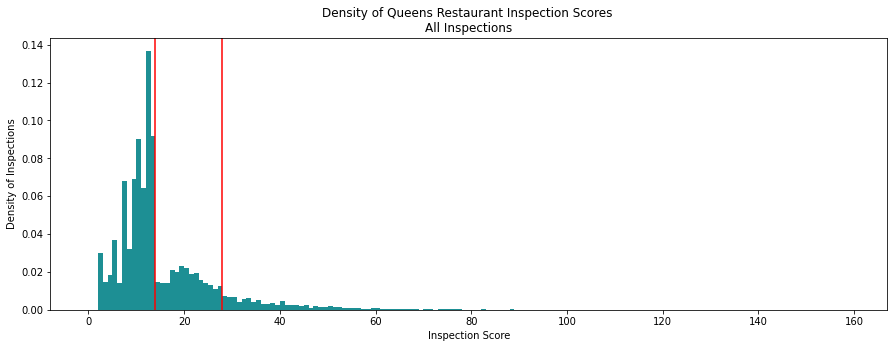

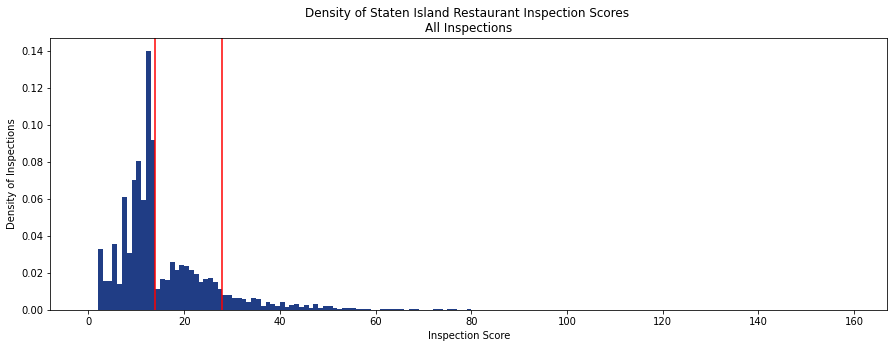

In [ ]:
def scores_by_borough(df, title):
    # Plot a histogram for each borough
    boroughs = df.boro.unique()
    colors = ['#EB6662', '#F7B172', "#82C881", "#1D8F94", "#203D85"]
    for i in range(len(boroughs)):
        borough_df = df.loc[df.boro == boroughs[i], ]
        plt.hist(borough_df['score'], density=True, bins=range(0, 160), color=colors[i], label = boroughs[i])
        # Add lines to indicate the cutoffs between A and B, then B and C
        plt.axvline(x=14, color="red")
        plt.axvline(x=28, color="red")
        # Add some labels
        plt.ylabel("Density of Inspections")
        plt.xlabel("Inspection Score")
        plt.title("Density of {} Restaurant Inspection Scores \n{}".format(boroughs[i], title))
        plt.show()
    return
    
scores_by_borough(inspections, "All Inspections")


## Step 6: Analysis of Starbucks

Our analysis above was very general -- each borough is a big and diverse place! (Okay, maybe not Staten Island.)

Instead, we can try looking at chains that have locations in all boroughs; that way, we know that borough is the only thing that varies in the sample. Let's use Starbucks as an example.

In [ ]:
# Create additional column called "starbucks" whose value is True if the restaurant is starbucks (dba == 'STARBUCKS') and False otherwise.
inspections['starbucks'] = np.where(inspections['dba'] == "STARBUCKS", True, False)
print("# of Starbucks: \n", inspections.groupby(['boro']).starbucks.sum())

# of Starbucks: 
 boro
Bronx             19
Brooklyn         130
Manhattan        678
Queens           132
Staten Island     24
Name: starbucks, dtype: int64


In [ ]:
inspections.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,year,starbucks
25293,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",2018-05-11,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,5.0,A,05/11/2018,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,2018,False
104446,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",2019-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,14.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,2019,False
96724,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",2017-05-18,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,7.0,A,05/18/2017,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,2017,False
25092,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",2019-06-11,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,6.0,A,06/11/2019,03/12/2021,Cycle Inspection / Re-inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,2019,False
49397,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462.0,7188924968,"Cakes, Cupcakes, Desserts",2019-10-21,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,17.0,NaN,NaN,03/12/2021,Cycle Inspection / Initial Inspection,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,2019,False


In [ ]:
inspections['starbucks'] = inspections.dba.str.startswith("STARBUCKS") & (~inspections.dba.str.contains("TAXI", na = False))
print("# of Starbucks: \n", inspections.groupby(['boro']).starbucks.sum())

# of Starbucks: 
 boro
Bronx             28
Brooklyn         163
Manhattan        819
Queens           152
Staten Island     30
Name: starbucks, dtype: int64


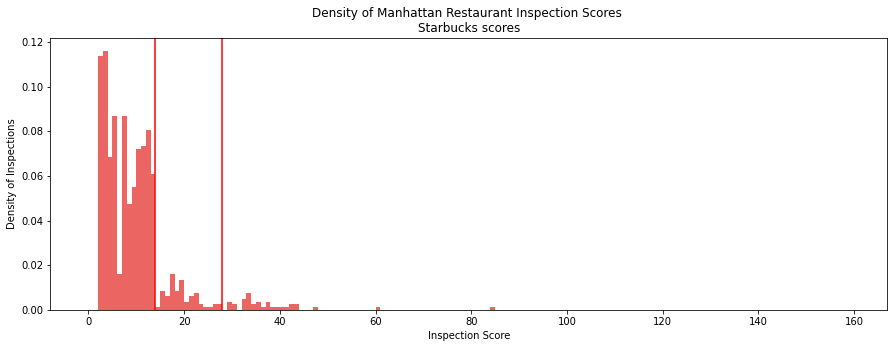

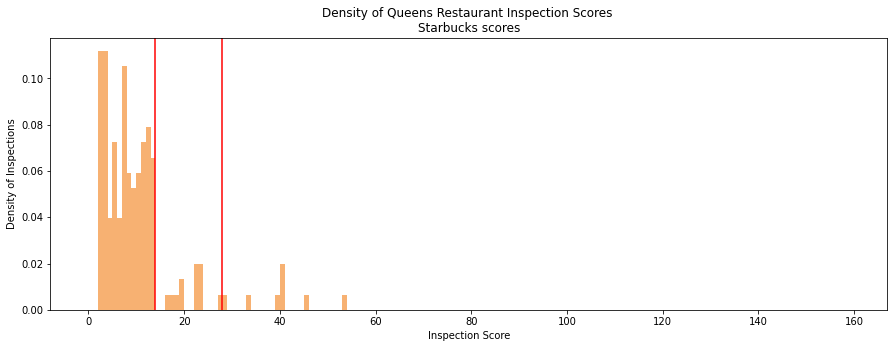

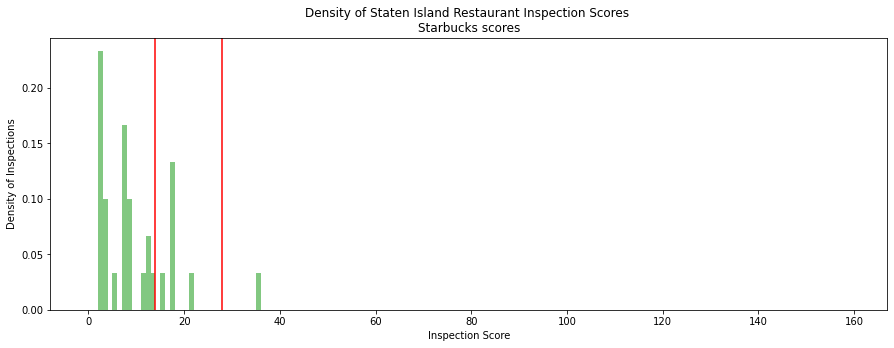

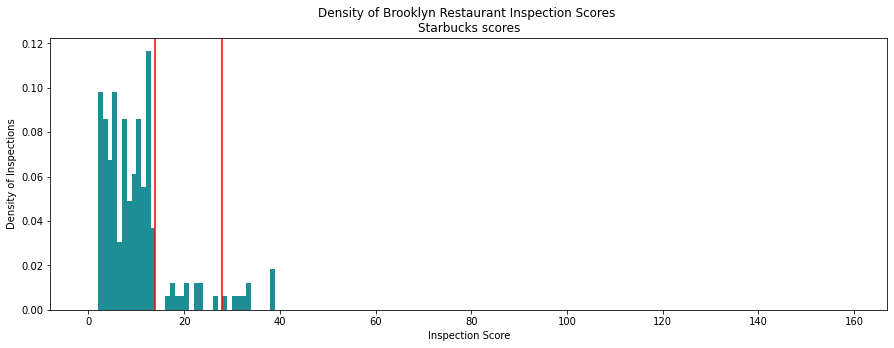

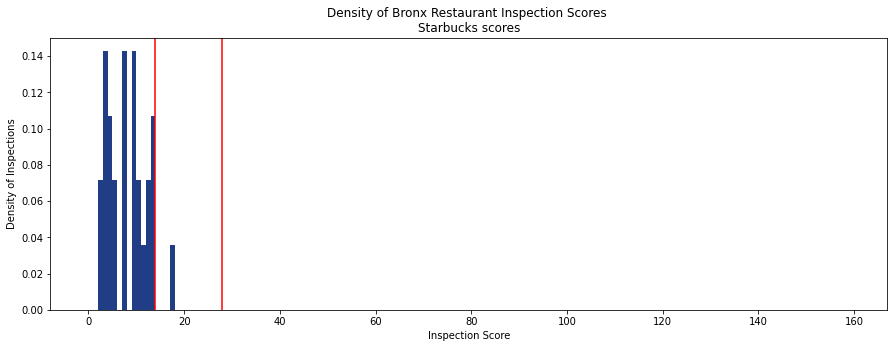

In [ ]:
# Plot distribution of the scores for starbucks in each borough using "scores_by_borough" function.
scores_by_borough(inspections.loc[inspections.starbucks == True], "Starbucks scores")

Do you see any differences in the distribution of scores by borough?

**Analysis**

It seems like the density of inspections for Staten Island are much more than for other boroughs. Also, for Staten Island, there are smaller number of scores that are just above a letter grade cutoff when compared to the other boroughs. For all the boroughs, there are a very small number of scores (for some boroughs, no scores) that are just below the cutoff. 

Lastly, consider that health inspectors may behave differently with respect to a multi-national corporation like Starbucks compared to a smaller or independent coffee store. Inspect the data for other coffee vendors:

In [ ]:
# Inspect data for other (non-Starbucks) coffee vendors
# Are there any columns that would enable you to identify coffee vendors only? Or do you need to use multiple columns?
inspections['non_star'] = inspections.cuisine_description.str.contains("cof", na = False) | inspections.dba.str.contains("COF", na = False)

In [ ]:
inspections['non_star'].describe()

count     110029
unique         2
top        False
freq      107798
Name: non_star, dtype: object

Does the pattern of scores above the A cutoff for other coffee vendors look similar to the pattern for Starbucks?

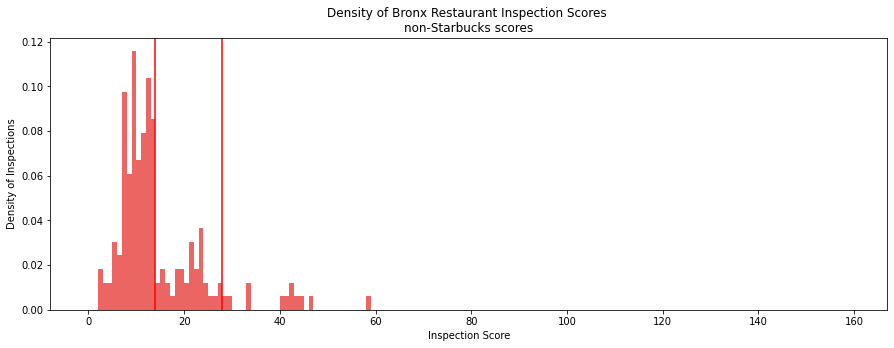

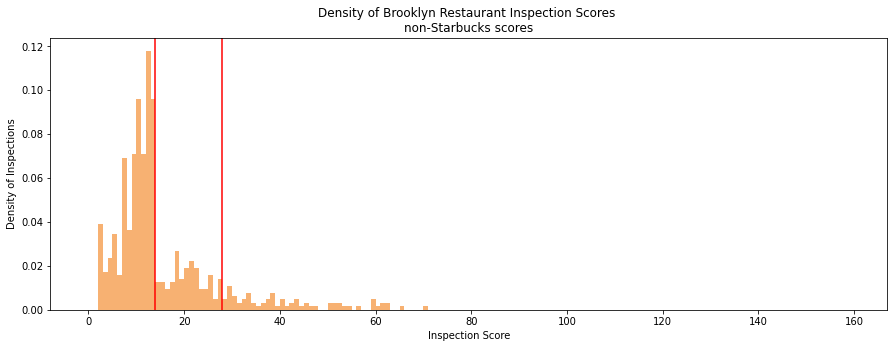

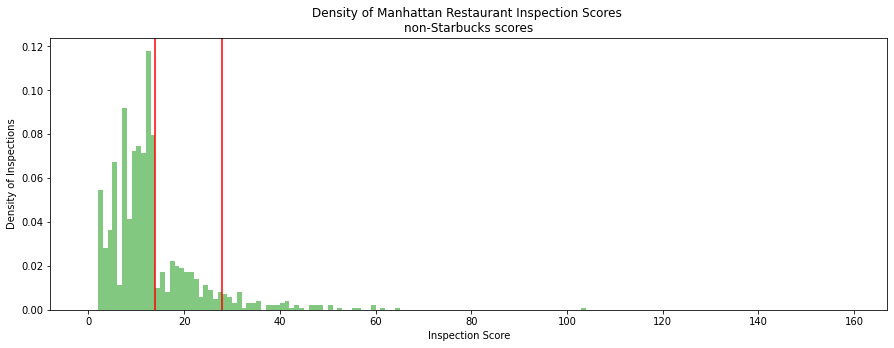

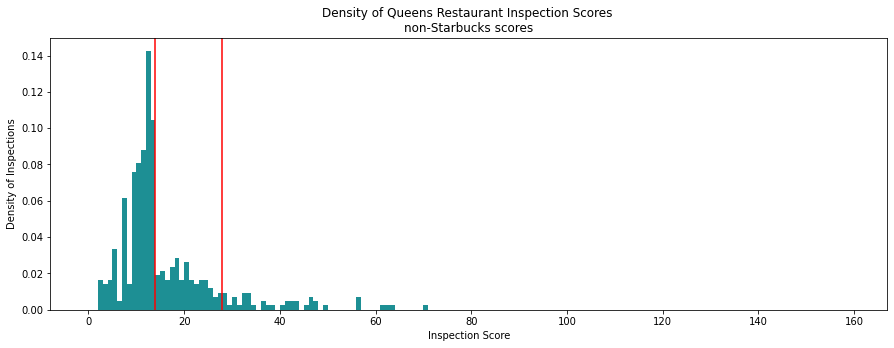

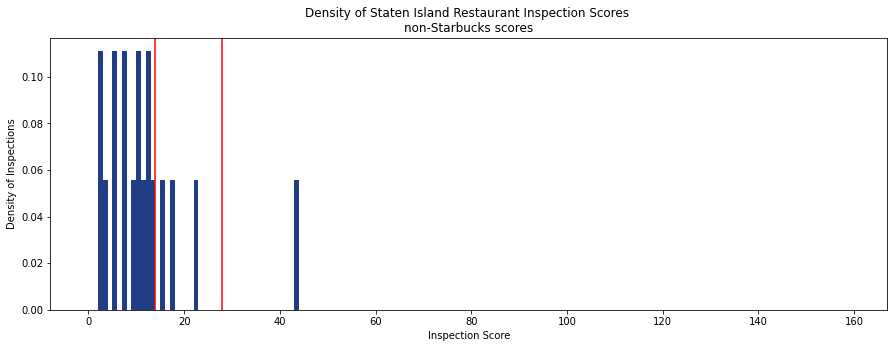

In [ ]:
# Plot the score distribution for non-Starbucks coffee vendors here
scores_by_borough(inspections.loc[inspections.non_star == True], "non-Starbucks scores")

**Observations**

It seems like the density of inspections for Staten Island are lesser than for other boroughs, which is the opposite trend from the inspection results for Starbucks. Overall, it looks like the density of inspections is lesser for non-Starbucks coffee shops, when compared to Starbucks. Also, the number of scores just above the letter grade cutoff are more for non-Starbucks shops than Starbucks. It's possible that Starbucks, being an international brand, has organically been able to achieve good scores, due to an adoption of company policy to maintain quality.